# MMDetection 패키지 및 Dependency 설치

In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 411.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+

In [ ]:
!pip install openmim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 14.6 MB/s eta 0:00:00


In [ ]:
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36110, done.
remote: Counting objects: 100% (764/764), done.
remote: Compressing objects: 100% (394/394), done.
remote: Total 36110 (delta 393), reused 641 (delta 361), pack-reused 35346
Receiving objects: 100% (36110/36110), 52.12 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (25331/25331), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


# Kaggle에서 데이터 불러오기

In [ ]:
%cd ../

!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hyojungkim6/synthetic-data
!kaggle datasets download -d hdime0528/dacon-data-annotation

!mkdir data
!unzip -q synthetic-data.zip -d data
!unzip -q dacon-data-annotation -d data

%cd mmdetection

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
100% 23.6G/23.6G [05:33<00:00, 107MB/s] 
100% 23.6G/23.6G [05:33<00:00, 76.0MB/s]
 91% 269M/295M [00:03<00:00, 66.0MB/s]
100% 295M/295M [00:03<00:00, 88.1MB/s]
replace data/train.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace data/valid.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
/content/mmdetection


In [ ]:
!rm ../*.zip

# Pretrained Weights 다운로드

In [ ]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2023-05-18 14:17:29--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.214, 8.25.82.207, 8.25.82.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

checkpoints/faster_ 100%[===================>] 159.54M  24.5MB/s    in 6.5s    

2023-05-18 14:17:36 (24.4 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



# 커스텀 데이터셋 + 트랜스포머 정의

In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class CarDataset(CocoDataset):
    CLASSES = (
         'chevrolet_malibu_2012',
         'chevrolet_malibu_2017',
         'chevrolet_spark_2016',
         'chevrolet_trailblazer_2021',
         'chevrolet_trax_2017',
         'genesis_g80_2016',
         'genesis_g80_2021',
         'genesis_gv80_2020',
         'hyundai_avante_2011',
         'hyundai_avante_2020',
         'hyundai_grandeur_2011',
         'hyundai_grandstarex_2018',
         'hyundai_ioniq_2016',
         'hyundai_sonata_2004',
         'hyundai_sonata_2010',
         'hyundai_sonata_2019',
         'kia_carnival_2015',
         'kia_carnival_2021',
         'kia_k5_2010',
         'kia_k5_2020',
         'kia_k7_2016',
         'kia_mohave_2020',
         'kia_morning_2004',
         'kia_morning_2011',
         'kia_ray_2012',
         'kia_sorrento_2015',
         'kia_sorrento_2020',
         'kia_soul_2014',
         'kia_sportage_2016',
         'kia_stonic_2017',
         'renault_sm3_2015',
         'renault_xm3_2020',
         'ssangyong_korando_2019',
         'ssangyong_tivoli_2016'
    )

    # 대회 규칙에 맞게 iou가 0.85를 넘어야 맞게 예측한걸로 변경
    def evaluate(self, results, metric='bbox', logger=None, jsonfile_prefix=None, classwise=False, proposal_nums=(100, 300, 1000), iou_thrs=None, metric_items=None):
        return super().evaluate(results, metric, logger, jsonfile_prefix, True, proposal_nums, [0.85], metric_items)

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [ ]:
import albumentations as A
import cv2
from mmdet.datasets import PIPELINES

@PIPELINES.register_module(force=True)
class TrainAug:
    def __init__(self, p=1):
        self.p = 1
    def __call__(self, results):
        transform = A.Compose([
            A.transforms.RandomBrightnessContrast(brightness_limit=(-0.2, -0.15), p=1),
            A.transforms.ToGray(p=1),
            A.MotionBlur(p=1)])
        results['img'] = transform(image=results['img'])['image']
        return results

@PIPELINES.register_module(force=True)
class TestAug:
    def __init__(self, p=1):
        self.p = 1

    def __call__(self, results):
        transform = A.Compose([A.transforms.RandomBrightnessContrast(brightness_limit=(0.15, 0.2), p=1), A.ToGray(p=1)])
        results['img'] = transform(image=results['img'])['image']
        return results

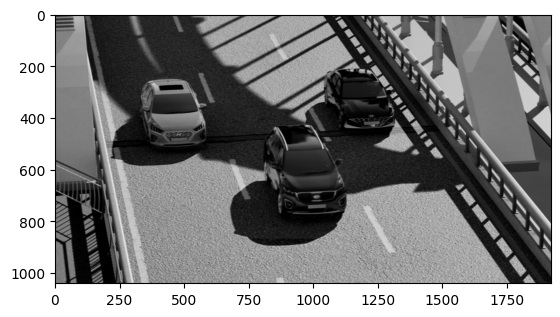

In [ ]:
import matplotlib.pyplot as plt
blur = A.Compose([A.transforms.RandomBrightnessContrast(brightness_limit=(-0.2, -0.15), p=1), A.transforms.ToGray(p=1), A.MotionBlur(p=1)])
plt.imshow(cv2.cvtColor(blur(image=cv2.imread('/content/data/open/train/syn_00000.png'))['image'], cv2.COLOR_BGR2RGB))

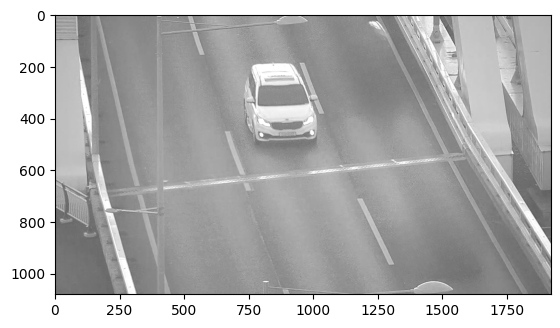

In [ ]:
test_aug = A.Compose([A.transforms.RandomBrightnessContrast(brightness_limit=(0.15, 0.2), p=1), A.ToGray(p=1)])
plt.imshow(test_aug(image=cv2.imread('/content/data/open/test/065147868.png'))['image'])

# Config 파일 설정

In [ ]:
from mmcv import Config
from mmcv.utils.config import ConfigDict
from mmdet.apis import set_random_seed

cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py')
#/content/sample_data
cfg.dataset_type = 'CarDataset'
cfg.data_root = '/content/data/synthetic-data'
cfg.data.samples_per_gpu = 6

cfg.model.rpn_head.anchor_generator.scales = [64, 128, 256, 300]
cfg.model.rpn_head.anchor_generator.ratios = [1.0, 2.0, 4.0, 6.0, 8.0]
cfg.model.train_cfg.rcnn.assigner.pos_iou_thr = 0.8
#cfg.model.train_cfg.rpn.assiner.
cfg.model.train_cfg.rpn.assigner.neg_iou_thr = 0.5
cfg.model.roi_head.bbox_head.loss_cls.loss_weight = 0.9
cfg.model.rpn_head.loss_cls.loss_weight = 0.9

cfg.data.train.type = 'CarDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train.json'
#cfg.data.train.ann_file = 'train_debug.json'
cfg.data.train.img_prefix = 'open/train/'
cfg.train_pipeline = cfg.train_pipeline[:4] + [ConfigDict(type='TrainAug')] + cfg.train_pipeline[4:]
cfg.train_pipeline[3].flip_ratio = 0.0
cfg.data.train.pipeline = cfg.train_pipeline

cfg.test_pipeline[1].transforms = cfg.test_pipeline[1].transforms[:2] + [ConfigDict(type='TestAug')] + cfg.test_pipeline[1].transforms[2:]
cfg.data.test.pipeline = cfg.test_pipeline

cfg.data.val.type = 'CarDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'valid.json'
#cfg.data.val.ann_file = 'valid_debug.json'
cfg.data.val.img_prefix = 'open/train/'

cfg.model.roi_head.bbox_head.num_classes = 34
cfg.load_from = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
#cfg.load_from = '/content/out/epoch_3.pth'
#cfg.resume_from = '/content/out/epoch_5.pth'

cfg.work_dir = '/content/out'
cfg.optimizer.lr = 0.005
cfg.log_config.interval = 10
cfg.runner.max_epochs = 10

cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 1
cfg.checkpoint_config.interval = 1

cfg.seed=12345
set_random_seed(12345, deterministic=False)
cfg.device='cuda'
cfg.gpu_ids = range(1)

cfg.log_config.hooks = [
    dict(type='TextLoggerHook')
]
cfg.custom_imports = dict(imports=['cardataset'], allow_failed_imports=False)
cfg.workflow = [('train', 1)]
cfg.opencv_numthreads = -1

In [ ]:
!mkdir ../out
cfg.dump(file='../out/car_detection_config.py')

# 학습 실행

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

train_dataset, val_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.val)]

model = build_detector(cfg.model)
model.CLASSES = train_dataset.CLASSES

train_detector(model, train_dataset, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2023-05-18 14:17:51,064 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-18 14:17:51,105 - mmdet - INFO - load checkpoint from local path: ./checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2023-05-18 14:17:51,406 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for rpn_head.rpn_cls.weight: copying a param with shape torch.Size([3, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([20, 256, 1, 1]).
size mismatch for rpn_head.rpn_cls.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([20]).
size mismatch for rpn_head.rpn_reg.weight: copying a param with shape torch.Size([12, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([80, 256, 1, 1]).
size mismatch for rpn_head.rpn_reg.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([80]).
size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([35, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1297/1297, 6.8 task/s, elapsed: 190s, ETA:     0s

2023-05-18 14:53:24,714 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.05s).
Accumulating evaluation results...


2023-05-18 14:53:25,994 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= large | maxDets=1000 ] = 0.014
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.022
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=300 ] = 0.022
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=1000 ] = 0.022
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= large | maxDet

DONE (t=0.22s).


2023-05-18 14:53:53,554 - mmdet - INFO - Epoch [2][10/864]	lr: 5.000e-03, eta: 4:50:22, time: 2.706, data_time: 0.370, memory: 12020, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0475, loss_cls: 0.0325, acc: 98.9809, loss_bbox: 0.0052, loss: 0.0957
2023-05-18 14:54:16,948 - mmdet - INFO - Epoch [2][20/864]	lr: 5.000e-03, eta: 4:50:08, time: 2.338, data_time: 0.071, memory: 12020, loss_rpn_cls: 0.0114, loss_rpn_bbox: 0.0534, loss_cls: 0.0316, acc: 99.0116, loss_bbox: 0.0052, loss: 0.1016
2023-05-18 14:54:38,905 - mmdet - INFO - Epoch [2][30/864]	lr: 5.000e-03, eta: 4:49:41, time: 2.196, data_time: 0.067, memory: 12020, loss_rpn_cls: 0.0115, loss_rpn_bbox: 0.0441, loss_cls: 0.0348, acc: 98.9568, loss_bbox: 0.0060, loss: 0.0965
2023-05-18 14:55:01,554 - mmdet - INFO - Epoch [2][40/864]	lr: 5.000e-03, eta: 4:49:20, time: 2.265, data_time: 0.068, memory: 12020, loss_rpn_cls: 0.0102, loss_rpn_bbox: 0.0448, loss_cls: 0.0339, acc: 98.9608, loss_bbox: 0.0053, loss: 0.0943
2023-05-18 14:55:24,456 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1297/1297, 6.8 task/s, elapsed: 192s, ETA:     0s

2023-05-18 15:29:37,011 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.95s).
Accumulating evaluation results...


2023-05-18 15:29:39,450 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= large | maxDets=1000 ] = 0.044
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.103
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=300 ] = 0.103
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=1000 ] = 0.103
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= large | maxDet

DONE (t=0.47s).


2023-05-18 15:30:06,238 - mmdet - INFO - Epoch [3][10/864]	lr: 5.000e-03, eta: 4:19:47, time: 2.625, data_time: 0.412, memory: 12020, loss_rpn_cls: 0.0060, loss_rpn_bbox: 0.0280, loss_cls: 0.0318, acc: 99.0682, loss_bbox: 0.0039, loss: 0.0696
2023-05-18 15:30:29,437 - mmdet - INFO - Epoch [3][20/864]	lr: 5.000e-03, eta: 4:19:26, time: 2.320, data_time: 0.070, memory: 12020, loss_rpn_cls: 0.0060, loss_rpn_bbox: 0.0299, loss_cls: 0.0319, acc: 99.0520, loss_bbox: 0.0044, loss: 0.0722
2023-05-18 15:30:52,038 - mmdet - INFO - Epoch [3][30/864]	lr: 5.000e-03, eta: 4:19:04, time: 2.260, data_time: 0.069, memory: 12020, loss_rpn_cls: 0.0065, loss_rpn_bbox: 0.0334, loss_cls: 0.0308, acc: 99.0917, loss_bbox: 0.0040, loss: 0.0747
2023-05-18 15:31:14,512 - mmdet - INFO - Epoch [3][40/864]	lr: 5.000e-03, eta: 4:18:41, time: 2.248, data_time: 0.068, memory: 12020, loss_rpn_cls: 0.0085, loss_rpn_bbox: 0.0343, loss_cls: 0.0318, acc: 99.0588, loss_bbox: 0.0042, loss: 0.0788
2023-05-18 15:31:38,127 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1297/1297, 6.6 task/s, elapsed: 196s, ETA:     0s

2023-05-18 16:05:56,953 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.20s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.00s).
Accumulating evaluation results...


2023-05-18 16:06:00,817 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= large | maxDets=1000 ] = 0.159
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.527
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=300 ] = 0.527
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=1000 ] = 0.527
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= large | maxDet

DONE (t=0.60s).


2023-05-18 16:06:29,307 - mmdet - INFO - Epoch [4][10/864]	lr: 5.000e-03, eta: 3:48:05, time: 2.792, data_time: 0.447, memory: 12020, loss_rpn_cls: 0.0057, loss_rpn_bbox: 0.0242, loss_cls: 0.0256, acc: 99.2352, loss_bbox: 0.0033, loss: 0.0587
2023-05-18 16:06:51,632 - mmdet - INFO - Epoch [4][20/864]	lr: 5.000e-03, eta: 3:47:42, time: 2.231, data_time: 0.070, memory: 12020, loss_rpn_cls: 0.0058, loss_rpn_bbox: 0.0274, loss_cls: 0.0272, acc: 99.1343, loss_bbox: 0.0040, loss: 0.0643
2023-05-18 16:07:15,181 - mmdet - INFO - Epoch [4][30/864]	lr: 5.000e-03, eta: 3:47:21, time: 2.356, data_time: 0.069, memory: 12020, loss_rpn_cls: 0.0054, loss_rpn_bbox: 0.0281, loss_cls: 0.0265, acc: 99.1186, loss_bbox: 0.0036, loss: 0.0636
2023-05-18 16:07:37,151 - mmdet - INFO - Epoch [4][40/864]	lr: 5.000e-03, eta: 3:46:57, time: 2.198, data_time: 0.070, memory: 12020, loss_rpn_cls: 0.0064, loss_rpn_bbox: 0.0280, loss_cls: 0.0260, acc: 99.1673, loss_bbox: 0.0040, loss: 0.0644
2023-05-18 16:07:59,903 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1297/1297, 6.6 task/s, elapsed: 197s, ETA:     0s

2023-05-18 16:42:12,633 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.66s).
Accumulating evaluation results...


2023-05-18 16:42:18,539 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= large | maxDets=1000 ] = 0.385
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.919
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=300 ] = 0.919
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=1000 ] = 0.919
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= large | maxDet

DONE (t=0.93s).


2023-05-18 16:42:47,503 - mmdet - INFO - Epoch [5][10/864]	lr: 5.000e-03, eta: 3:15:37, time: 2.831, data_time: 0.442, memory: 12020, loss_rpn_cls: 0.0058, loss_rpn_bbox: 0.0267, loss_cls: 0.0207, acc: 99.2602, loss_bbox: 0.0043, loss: 0.0575
2023-05-18 16:43:10,038 - mmdet - INFO - Epoch [5][20/864]	lr: 5.000e-03, eta: 3:15:14, time: 2.253, data_time: 0.070, memory: 12020, loss_rpn_cls: 0.0047, loss_rpn_bbox: 0.0236, loss_cls: 0.0208, acc: 99.2710, loss_bbox: 0.0042, loss: 0.0533
2023-05-18 16:43:33,698 - mmdet - INFO - Epoch [5][30/864]	lr: 5.000e-03, eta: 3:14:52, time: 2.367, data_time: 0.074, memory: 12020, loss_rpn_cls: 0.0048, loss_rpn_bbox: 0.0235, loss_cls: 0.0190, acc: 99.4125, loss_bbox: 0.0043, loss: 0.0516
2023-05-18 16:43:55,758 - mmdet - INFO - Epoch [5][40/864]	lr: 5.000e-03, eta: 3:14:29, time: 2.206, data_time: 0.071, memory: 12020, loss_rpn_cls: 0.0042, loss_rpn_bbox: 0.0247, loss_cls: 0.0191, acc: 99.3753, loss_bbox: 0.0041, loss: 0.0520
2023-05-18 16:44:18,891 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1297/1297, 6.6 task/s, elapsed: 197s, ETA:     0s

2023-05-18 17:18:43,904 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.51s).
Accumulating evaluation results...


2023-05-18 17:18:50,038 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.85:0.85 | area= large | maxDets=1000 ] = 0.629
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=100 ] = 0.981
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=300 ] = 0.981
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=   all | maxDets=1000 ] = 0.981
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.85:0.85 | area= large | maxDet

DONE (t=1.32s).


2023-05-18 17:19:16,494 - mmdet - INFO - Epoch [6][10/864]	lr: 5.000e-03, eta: 2:43:12, time: 2.578, data_time: 0.368, memory: 12020, loss_rpn_cls: 0.0055, loss_rpn_bbox: 0.0261, loss_cls: 0.0155, acc: 99.4725, loss_bbox: 0.0046, loss: 0.0517
2023-05-18 17:19:40,401 - mmdet - INFO - Epoch [6][20/864]	lr: 5.000e-03, eta: 2:42:50, time: 2.389, data_time: 0.072, memory: 12020, loss_rpn_cls: 0.0062, loss_rpn_bbox: 0.0285, loss_cls: 0.0148, acc: 99.5859, loss_bbox: 0.0047, loss: 0.0541
2023-05-18 17:20:02,533 - mmdet - INFO - Epoch [6][30/864]	lr: 5.000e-03, eta: 2:42:27, time: 2.215, data_time: 0.069, memory: 12020, loss_rpn_cls: 0.0062, loss_rpn_bbox: 0.0261, loss_cls: 0.0147, acc: 99.5030, loss_bbox: 0.0048, loss: 0.0519
2023-05-18 17:20:27,129 - mmdet - INFO - Epoch [6][40/864]	lr: 5.000e-03, eta: 2:42:06, time: 2.460, data_time: 0.074, memory: 12020, loss_rpn_cls: 0.0044, loss_rpn_bbox: 0.0207, loss_cls: 0.0137, acc: 99.5541, loss_bbox: 0.0046, loss: 0.0434
2023-05-18 17:20:49,840 - mm

# 결과 시각화

In [ ]:
import mmcv
from mmdet.apis import show_result_pyplot, inference_detector
model.cfg = cfg
image = mmcv.imread('/content/data/open/test/065331262.png')
result = inference_detector(model, image)
show_result_pyplot(model, image, result)

# submission.csv 작성

In [ ]:
import glob
from tqdm import tqdm

with open('/content/out/resnet50_fasterrcnn_epoch3.csv', 'w') as fd:
    fd.write('file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y\n')

    for img in tqdm(glob.glob('/content/data/open/test/*'), desc='Test: ', ncols=75):
        input = mmcv.imread(img)
        result = inference_detector(model, input)
        file_name = img.split('/')[-1]

        for c_id, boxes in [x for x in enumerate(result) if len(x[1]) > 0]:
            for box in boxes:
                x1, y1, x3, y3, confidence = box
                x2, y2 = x3, y1
                x4, y4 = x1, y3
                fd.write(f'{file_name},{c_id},{confidence},{x1},{y1},{x2},{y2},{x3},{y3},{x4},{y4}\n')

Test: 100%|████████████████████████████| 3400/3400 [13:22<00:00,  4.24it/s]
